<a href="https://www.kaggle.com/code/mikedelong/price-and-volume-eda-with-lineplots?scriptVersionId=138812755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import pandas as pd
dirname = '/kaggle/input/global-stock-market-2008-present'
filenames = [filename for filename in os.listdir(dirname) if os.path.isfile(os.path.join(dirname, filename))]
df = pd.concat([
    pd.read_csv(filepath_or_buffer=os.path.join(dirname, filename), parse_dates=['Date'])
    for filename in sorted(filenames)
])

In [2]:
df.shape

(44900, 8)

In [3]:
pd.concat(objs=[df.dtypes, df.isna().sum()], axis=1).T

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,object,datetime64[ns],float64,float64,float64,float64,float64,float64
1,0,0,0,0,0,0,0,0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Date', ylabel='Adj Close'>

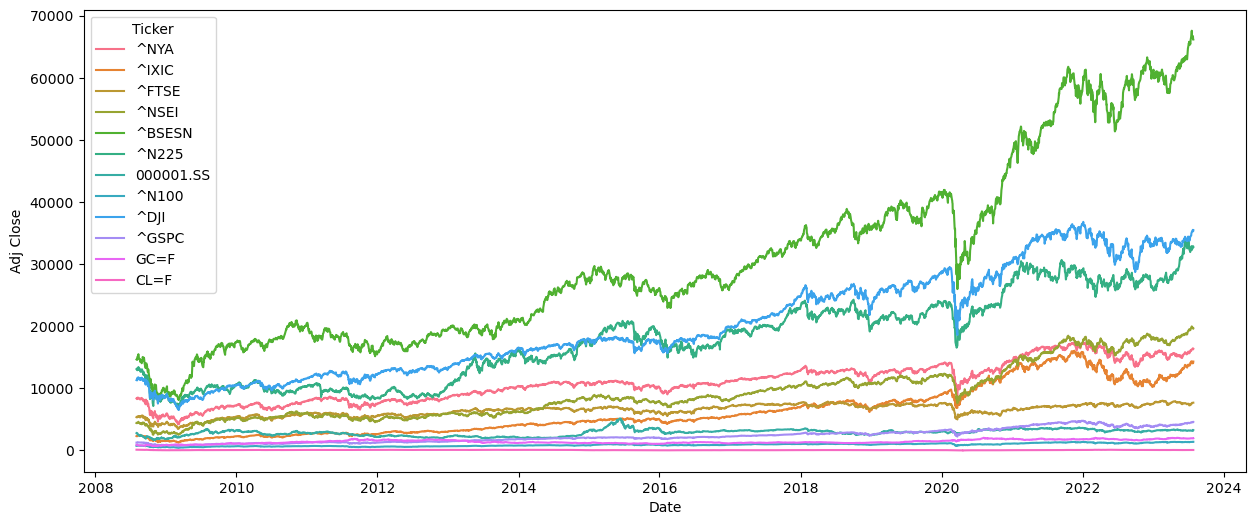

In [4]:
from matplotlib.pyplot import subplots
from seaborn import lineplot

figsize = (15, 6)
_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=df, x='Date', hue='Ticker', y='Adj Close', )

Let's look at the correlations.

<Axes: xlabel='Ticker', ylabel='Ticker'>

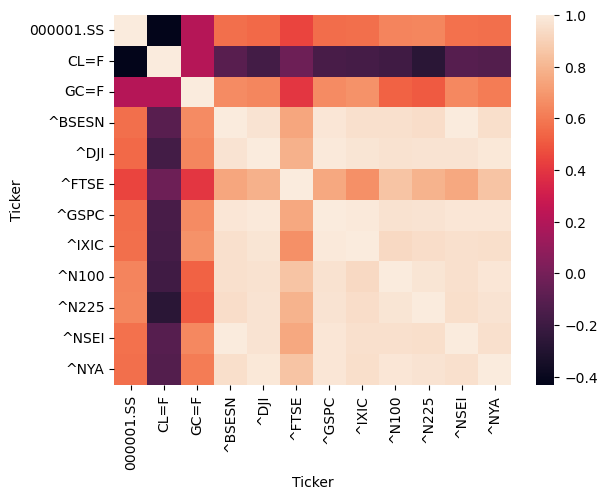

In [5]:
from seaborn import heatmap
heatmap(data=df[['Date', 'Ticker', 'Adj Close']].pivot(index='Date', columns=['Ticker'], values='Adj Close').corr())

I guess it isn't surprising that equities are highly correlated. Let's add a volume plot.

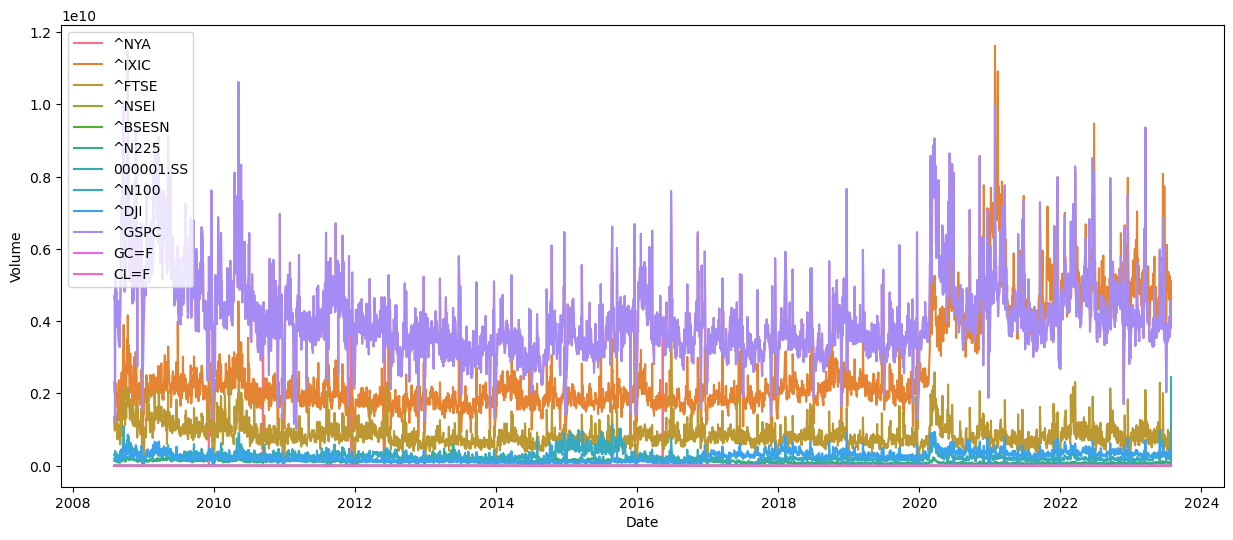

In [6]:
from matplotlib.pyplot import legend
_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=df, x='Date', hue='Ticker', y='Volume', )
legend(loc='upper left')

We'd be remiss if we didn't look at the volume correlations.

<Axes: xlabel='Ticker', ylabel='Ticker'>

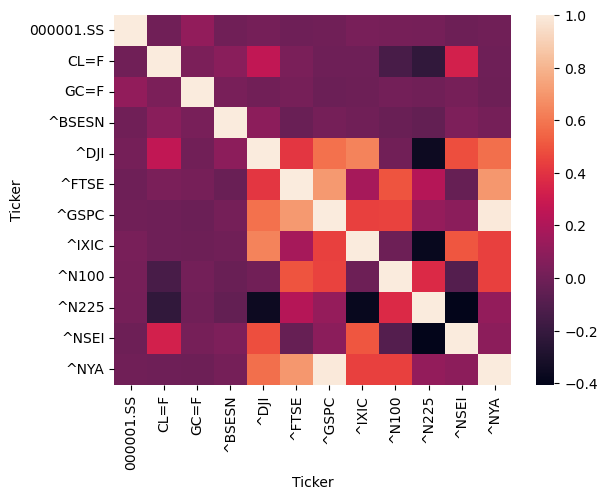

In [7]:
heatmap(data=df[['Date', 'Ticker', 'Volume']].pivot(index='Date', columns=['Ticker'], values='Volume').corr())

Monthly averaged volume may make trends easier to see.

<Axes: xlabel='Date', ylabel='Volume'>

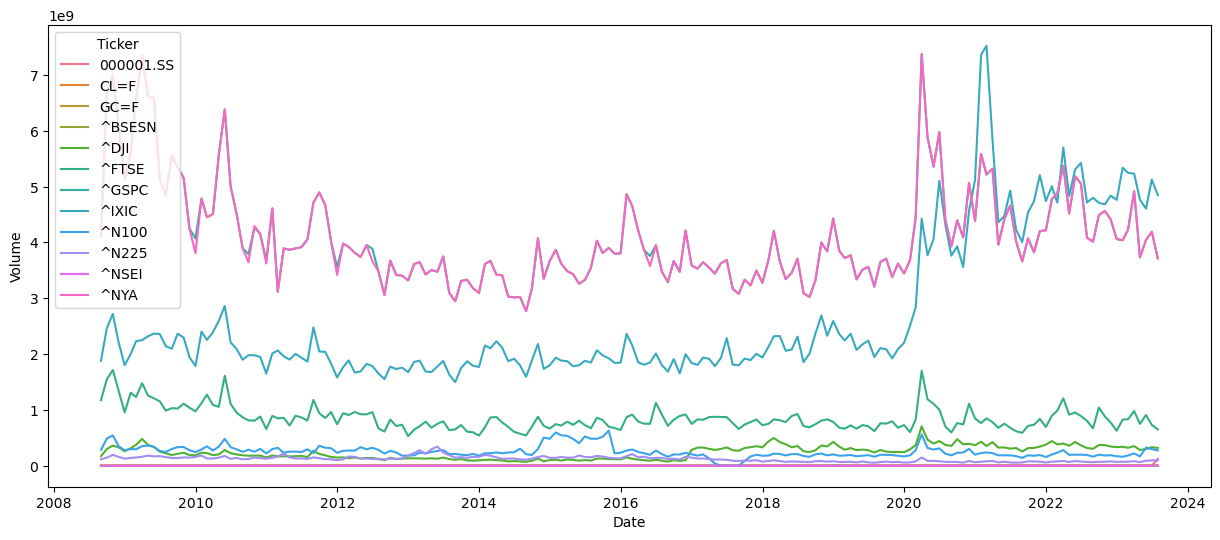

In [8]:
volume_df = df[['Date', 'Ticker', 'Volume']].pivot(index='Date', columns=['Ticker'], values='Volume')
volume_df.index = pd.to_datetime(volume_df.index)

_, ax = subplots(figsize=figsize)
lineplot(ax=ax, data=volume_df.resample('M').mean().reset_index().melt(id_vars=['Date'], var_name='Ticker',  value_name='Volume'),
         x='Date', y='Volume', hue='Ticker'   )

It really seems like one or maybe two of those indices have big jumps in volume in early 2020. 

In [9]:
# scale by the initial value
scaled_volume_df = volume_df.copy(deep=True).reset_index()
scaled_volume_df = scaled_volume_df[scaled_volume_df['Date'].dt.year > 2019]
# NSEI is problematic for this exercise so we're going to drop it
# scaled_volume_df = scaled_volume_df.drop(columns=['^NSEI', '000001.SS', '^BSESN'])
# for column in scaled_volume_df.columns:
#     if column != 'Date':
#         weight = 1.0 / scaled_volume_df[column].iloc[0]
#         scaled_volume_df[column] *= weight
# scaled_volume_df.index = pd.to_datetime(scaled_volume_df['Date'])
scaled_volume_df.head()
# _, ax = subplots(figsize=figsize)
# lineplot(ax=ax, data=scaled_volume_df.resample('W').mean().reset_index().melt(id_vars=['Date'], var_name='Ticker',  value_name='Volume'),
#          x='Date', y='Volume', hue='Ticker'   )

Ticker,Date,000001.SS,CL=F,GC=F,^BSESN,^DJI,^FTSE,^GSPC,^IXIC,^N100,^N225,^NSEI,^NYA
2971,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304100.0,NaN
2972,2020-01-02,292500.0,486873.0,214.0,5300.0,251820000.0,482206700.0,3.459930e+09,2.862700e+09,146422800.0,NaN,407700.0,3.459930e+09
2973,2020-01-03,261500.0,885861.0,107.0,8900.0,239590000.0,475628900.0,3.484700e+09,2.586520e+09,140653000.0,NaN,428800.0,3.484700e+09
2974,2020-01-06,312600.0,724236.0,416.0,8700.0,252760000.0,516783400.0,3.702460e+09,2.810450e+09,163285900.0,72800000.0,396500.0,3.702460e+09
2975,2020-01-07,276600.0,582649.0,47.0,11900.0,258900000.0,511576100.0,3.435910e+09,2.381740e+09,160812000.0,64300000.0,447800.0,3.435910e+09
